<a href="https://colab.research.google.com/github/Git-Yousfi-Neji/Traffic-Sign-Recognition/blob/main/traffic_sign_classification_TRAINING_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connecting to google drive**

---



In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=False)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Importing modules**

---


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
from itertools import chain
from skimage import color
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# **Parametres**

---


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/traffic signs python/traffic_sign/myData"
labels = "/content/drive/My Drive/Colab Notebooks/traffic signs python/traffic_sign/labels.csv"
batchSizeVal = 50 # how many to process together (blocks of 50)
stepsPerEpoch = 200
epochsVal = 60 # the larger epochs the more time to train
imageDimention = (32,32,3) # 3 for RGB colors
testRatio = 0.2 # for each 1000 images 200 images will be kept for testing
validationRatio = 0.2 # the remaining 800 20% of'em will kept for validation (160)
batch_size_value = 10
steps_per_epoch_value = None
epochs_value = 15

#**Importing all images in one array**
---



In [ ]:
count = 0
images = []
classNumber = []
myList = os.listdir(path)
print(">> Total Classes Detected:",len(myList))
numberOfClasses=len(myList)
print("Importing Classes...")


for x in range (len(myList)):
    for y in os.listdir(path+"/"+str(count)):
        images.append(cv2.imread(path+"/"+str(count)+"/"+y))
        classNumber.append(count)
    print('>>> class ',count, end ="\n")
    count +=1
print(" ")
images = np.array(images)
classNumber = np.array(classNumber)
len(images)
np.save('drive/My Drive/Colab Notebooks/traffic signs python/traffic_sign/images_array.npy', images)
print('\nimages successfully saved !')

In [ ]:
 imageNumberInClass=[]
 count = 0
 numberOfClasses=len(os.listdir(path))
for i in range(numberOfClasses):
    for j in os.listdir(path+'/'+str(count)):
        imageNumberInClass.append(count)
    print(count,'|',end=' ')
    count+=1
print(' ')
    
imageNumberInClass=np.array(imageNumberInClass)
images = np.load('/content/drive/My Drive/Colab Notebooks/traffic signs python/traffic_sign/images_array.npy')
assert(len(imageNumberInClass) == images.shape[0])
print('Done!')

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 |  
Done!


# **Splitting data**

---


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(images,imageNumberInClass,test_size=testRatio)
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size=validationRatio)

#**Check if there is a mismatch in data**
---


In [ ]:
print('data shapes',end='\n')
 
print(f'x_train shape :{x_train.shape}',end='\n')
print(f'y_train shape :{y_train.shape}',end='\n\n')
 
print(f'x_test shape :{x_test.shape}',end='\n')
print(f'y_test shape :{y_test.shape}',end='\n\n')
 
print(f'x_validatio shape :{x_validation.shape}',end='\n')
print(f'y_valoidation shape :{y_validation.shape}',end='\n\n')
 
assert(x_train.shape[0] == y_train.shape[0])
assert(x_test.shape[0] == y_test.shape[0])
assert(x_validation.shape[0] == y_validation.shape[0])
 
assert(x_train.shape[1:] == (imageDimention))
assert(x_test.shape[1:] == (imageDimention))
assert(x_validation.shape[1:] == (imageDimention))
print('everything is correct ')

data shapes
x_train shape :(22271, 32, 32, 3)
y_train shape :(22271,)

x_test shape :(6960, 32, 32, 3)
y_test shape :(6960,)

x_validatio shape :(5568, 32, 32, 3)
y_valoidation shape :(5568,)

everything is correct 


# **Reading csv file and make some plots**

   ClassId                  Name
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


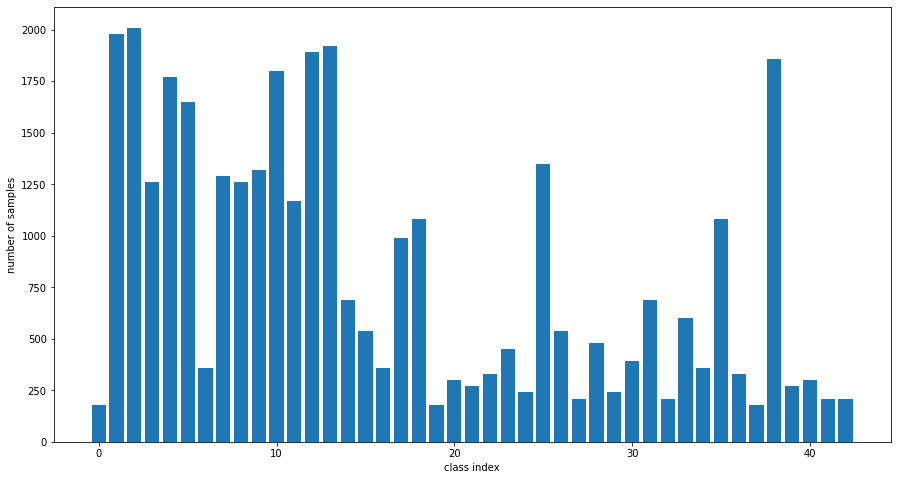

In [ ]:
 
imageNumberInClass = [len(os.listdir(path+'/'+str(i))) for i in range(43)]
data = pd.read_csv(labels)
print(data.head(5))
plt.figure(figsize=(15,8))
plt.bar(range(len(imageNumberInClass)),imageNumberInClass,width=.8)
imageNumberInClass=np.array(imageNumberInClass)
plt.xlabel('class index')
plt.ylabel('number of samples')
plt.show()

# **Preprocessing images to work with**

---



In [ ]:
# run it just one time to avoid getting erro
def grayscale(image):       # convert the image to grayscale
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return image
def equalize(image):       # standarization of lightning in the image
    image = cv2.equalizeHist(image)
    return image
def preprocessing(image):  
    image = grayscale(image)
    image = equalize(image)
    image = image/255          # standarization of the pixels each in [0,1]
    return image
 
x_train = np.array(list(map(preprocessing,x_train)))
x_test = np.array(list(map(preprocessing,x_test)))
x_validation = np.array(list(map(preprocessing,x_validation)))

# **add a depth of 1**

---


In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_validation = x_validation.reshape(x_validation.shape[0],x_validation.shape[1],x_validation.shape[2],1)
#y_validation = y_validation.reshape(y_validation.shape[0],y_validation.shape[1],y_validation.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

# **Images augmentation (make them more generic)**

---



In [ ]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 10%
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 means zoom goes from 1-0.1 to 1+0.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # rotation of 10 degrees
            
dataGen.fit(x_train)
batches= dataGen.flow(x_train,y_train,batch_size=20)  # requiesting dataGen to generate 20 images each time called
x_batch,y_batch = next(batches)

# **Plotting some augmented images**

---



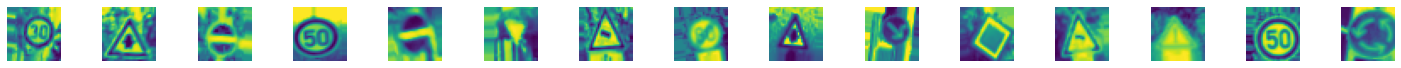

In [ ]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(x_batch[i].reshape(imageDimention[0],imageDimention[1]))
    axs[i].axis('off')
plt.show()
 
y_train = to_categorical(y_train,43)
y_validation = to_categorical(y_validation,43)
y_test = to_categorical(y_test,43)

# **Convolution neural network function**

---



In [ ]:
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
                         # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500   # NO. OF NODES IN HIDDEN LAYERS
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimention[0],imageDimention[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(numberOfClasses,activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    print('model compiled successfully')
    return model

# **Training the model**

---



In [ ]:
print(x_validation.shape)
print(y_validation.shape)
model = myModel()
print(model.summary())
print(x_validation.shape,'\n',y_validation.shape)
 
data_generator = dataGen.flow(x_train,y_train,batch_size=batch_size_value)
history=model.fit( data_generator,
                             steps_per_epoch=steps_per_epoch_value,
                             epochs=epochs_value,
                             shuffle=True,
                             validation_data=(x_validation,y_validation)
                             )
print('Done')

(5568, 32, 32, 1)
(5568, 43)
model compiled successfully
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________

# **Making plots of loss & accuracy**

---



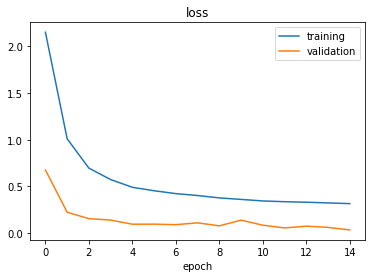

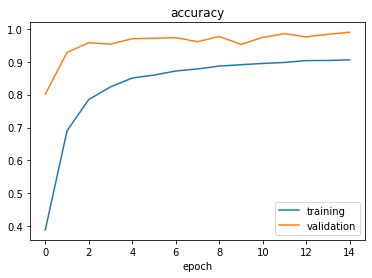

test score >>  0.03999212011694908
test accuracy >>  0.991235613822937


In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
 
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('accuracy')
plt.xlabel('epoch')
 
plt.show()
score = model.evaluate(x_test,y_test,verbose=0)
print('test score >> ',score[0])
print('test accuracy >> ',score[1])

# **Save the model**

---





In [ ]:
file_path = 'drive/My Drive/Colab Notebooks/traffic signs python/traffic_sign/traffic_sign_model.h5'
model.save(filepath=file_path,overwrite=True,include_optimizer=True,save_format='pickle')
print('model saved !')

model saved !



---

